# Behind the Curtain -- Campaign Finance Data Analysis
## Thunder Shiviah


# Questions

* When do filings occur?
* What is the distribution of amounts?
* What do the distributions of amounts look like for each Filer?
* What's the difference between filer, contributor, attest, payee?
* Where on the map do the addresses lie?
* What's diff between Emp address and filing address?
* What distributions best fit the data?

# Viz

## When do filings occur?

* Graph date vs contributor name (bubble)
* Graph date vs total amount (line)
* Graph date vs individual amounts (line)

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline

In [86]:
df = pd.read_csv('../data/sample/orestar.csv', encoding="utf-8-sig")
#df = pd.read_csv('../../../../work/hack_oregon/competition/data/raw_committee_transactions_comma'
#                 , error_bad_lines=False, warn_bad_lines=False, encoding="utf-8-sig") # error_bad_lines=False skips rows that have too many columns, warn_bad_lines silences the warnings.

df.columns

Index(['Tran Id', 'Original Id', 'Tran Date', 'Tran Status', 'Filer',
       'Contributor/Payee', 'Sub Type', 'Amount', 'Aggregate Amount',
       'Contributor/Payee Committee ID', 'Filer Id', 'Attest By Name',
       'Attest Date', 'Review By Name', 'Review Date', 'Due Date',
       'Occptn Ltr Date', 'Pymt Sched Txt', 'Purp Desc', 'Intrst Rate',
       'Check Nbr', 'Tran Stsfd Ind', 'Filed By Name', 'Filed Date',
       'Addr book Agent Name', 'Book Type', 'Title Txt', 'Occptn Txt',
       'Emp Name', 'Emp City', 'Emp State', 'Employ Ind', 'Self Employ Ind',
       'Addr Line1', 'Addr Line2', 'City', 'State', 'Zip', 'Zip Plus Four',
       'County', 'Purpose Codes', 'Exp Date'],
      dtype='object')

### Graph date vs contributor/filer name (bubble)

* Need date, contributor, filer, amount, aggregate amount

In [87]:
df1 = df.loc[:, ['Tran Id', 'Tran Date', 'Filer', 'Contributor/Payee', 'Amount', 'Aggregate Amount']]


In [88]:
df1.sort(columns='Amount', ascending=False) # Sort by amount in descending.

,Tran Id,Tran Date,Filer,Contributor/Payee,Amount,Aggregate Amount
3949,2035966,06/08/2015,Citizen Action for Political Education,SEIU COPE,78703.02,0.00
1680,2032656,06/22/2015,Libraries Yes! Committee,The Library Foundation,75000.00,75000.00
3766,2028351,06/08/2015,Act Now for a Healthy Oregon Political Committee,GBA Strategies,38000.00,38000.00
2429,2030556,06/16/2015,Oregon Hospital Political Action Committee,Oregon Healthcare Enterprises,32000.00,32000.00
444,2037147,07/02/2015,Oregon Hospital Political Action Committee,Oregon Healthcare Enterprises,32000.00,64000.00
724,2036097,06/30/2015,Nurses United Political Action Committee,Our Oregon,30000.00,30000.00
4088,2025781,06/05/2015,Oregon Ambulatory Surgery Center Association,The Portland Clinic LLP,25000.00,25000.00
2279,2031081,06/17/2015,Truth In Sentencing,Loren E Parks,25000.00,37500.00
3130,2033004,06/12/2015,ORLAPAC,Hilton Portland Executive Tower,20743.82,24743.82
2189,2032334,06/18/2015,MONICA PAC,Gretchen Brooks,20000.00,20000.00


Remark: Why does ID:3949 (Tran ID:2035966, Filer:Citizen Action for Political Education) have a list amount of \$78703.02 but an aggregate amount of \$0.00? A similar case happens with ID:2335-2336 (Tran ID:2032639-2032640) where the Nurses United Political Action Committee has two donations of \$16901.05 but an aggregate amount of \$0.00.

In [89]:
amounts = df1.iloc[:,4:6]

amounts.describe() # Get stats on amounts

,Amount,Aggregate Amount
count,4999.000000,4999.000000
mean,387.613865,1052.660792
std,2165.157206,5409.205439
min,-2289.440000,0.000000
25%,25.000000,0.000000
50%,56.470000,150.000000
75%,165.500000,360.000000
max,78703.020000,131036.390000


Remark: Why is the min amount negative? How are there negative contributions? Also, the max is over an order of magnitude larger than both third quartiles. I don't think this is a normal distribution.

In [90]:
amount = amounts['Amount'] # Histogramming
# amount.value_counts() # Returns count of contribution amounts

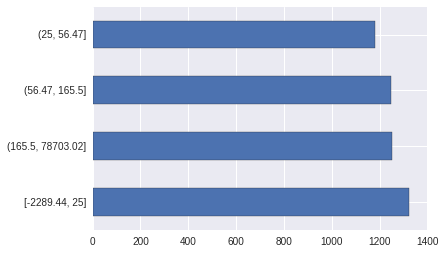

In [91]:
amount_factor = pd.qcut(amount, [0, .25, .5, .75, 1]) # Returns binning based on quartiles
pd.value_counts(amount_factor).plot(kind='barh')

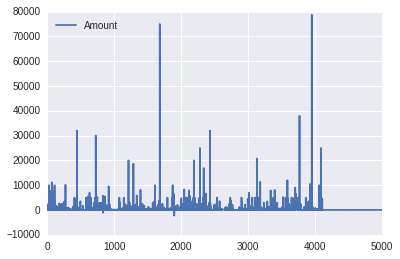

In [92]:
plt.figure(); amount.plot();  plt.legend(loc='best')

The amount quartile categories are:

```
Categories (4, object): [[-2289.44, 25], (25, 56.47], (56.47, 165.5], (165.5, 78703.02]]
```


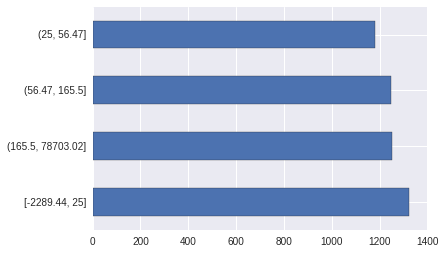

In [93]:
aggregate_amounts = amounts['Aggregate Amount']
#aggregate_amounts.value_counts()
agg_amount_factor = pd.qcut(amount, [0, .25, .5, .75, 1]) # Returns binning based on quartiles
pd.value_counts(agg_amount_factor).plot(kind='barh')

The aggregate amount quartile categories are:

```
Categories (4, object): [[-2289.44, 25], (25, 56.47], (56.47, 165.5], (165.5, 78703.02]]
```

Note: See [pandas tablewise function application section](http://pandas.pydata.org/pandas-docs/stable/basics.html#tablewise-function-application) for an overview on using pipes and distribution fitting using statsmodels.



In [94]:
dft = df1.copy() # Make a copy for datetime manipulation.
dft['Tran Date'] = pd.to_datetime(dft['Tran Date']) 


### Plotting

In [95]:
dft.iloc[0] # Why does Barb for Bend have transaction date of 2023?


Tran Id                                                     1866476
Tran Date                                       2023-02-11 00:00:00
Filer                                                 Barb for Bend
Contributor/Payee    Miscellaneous Cash Expenditures $100 and under
Amount                                                         9.99
Aggregate Amount                                                  0
Name: 0, dtype: object

In [96]:
dft = dft[dft.loc[:, "Tran Date"] < pd.datetime(2016,1,1)] # This filters Barb for Bend 2023 transaction only.


In [97]:
dft = dft.iloc[:,1:] # Get rid of tran id.


In [98]:
dft = dft[dft > 0] # Replace negative amounts with NaN. Why are there negative amounts?


In [99]:
dft2 = dft.set_index("Tran Date") # Index over datetime so we can graph frequencies.

In [100]:
dft2 = dft2.sort_index()
dft2

,Filer,Contributor/Payee,Amount,Aggregate Amount
Tran Date,,,,
2015-06-05,Local 48 Electricians PAC,Thomas Bassen,23.70,133.70
2015-06-05,Local 48 Electricians PAC,Christopher Ross,6.00,110.05
2015-06-05,Local 48 Electricians PAC,KRISTOPHER LEE,31.50,135.45
2015-06-05,Local 48 Electricians PAC,ROB WARD,28.80,147.75
2015-06-05,Local 48 Electricians PAC,PHILLIP HADALLER,30.00,144.90
2015-06-05,Local 48 Electricians PAC,KEVIN ENG,21.15,104.03
2015-06-05,Local 48 Electricians PAC,RANDALL SUNSET,28.50,142.20
2015-06-05,Local 48 Electricians PAC,CHRISTOPHER SMITH,28.50,106.30
2015-06-05,Local 48 Electricians PAC,Patrick Johnson,25.65,106.85


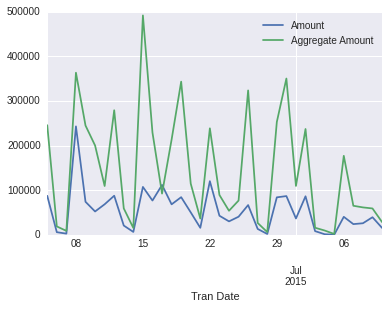

In [101]:
gb = dft2.groupby(pd.TimeGrouper('D'))
gb.sum().plot() # TODO: How do I sanity check this?

In [102]:
gb.sum()

,Amount,Aggregate Amount
Tran Date,,
2015-06-05,87739.37,245914.86
2015-06-06,6295.24,19211.99
2015-06-07,3043.37,9251.79
2015-06-08,243354.45,363586.05
2015-06-09,74391.44,245198.69
2015-06-10,52688.46,200514.82
2015-06-11,68821.44,109757.83
2015-06-12,87975.98,279504.85
2015-06-13,21145.21,59549.47
